In [15]:
pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
df = pd.read_csv('Documents/01. Daily Reports/05. PLX/volume_dataset_forecast.csv')
print(df.head())
print(df.dtypes)

         DATE   AMOUNT
0  2021-03-01  4994663
1  2021-03-02  7387373
2  2021-03-03  5363164
3  2021-03-04  7891971
4  2021-03-05  9037821
DATE      object
AMOUNT     int64
dtype: object


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.head())
print(df.dtypes)

        DATE   AMOUNT
0 2021-03-01  4994663
1 2021-03-02  7387373
2 2021-03-03  5363164
3 2021-03-04  7891971
4 2021-03-05  9037821
DATE      datetime64[ns]
AMOUNT             int64
dtype: object


In [7]:
df.set_index('DATE', inplace=True)

In [8]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2021-03-01 to 2022-01-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AMOUNT  329 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB
None


,AMOUNT
DATE,
2021-03-01,4994663
2021-03-02,7387373
2021-03-03,5363164
2021-03-04,7891971
2021-03-05,9037821


<AxesSubplot:xlabel='DATE'>

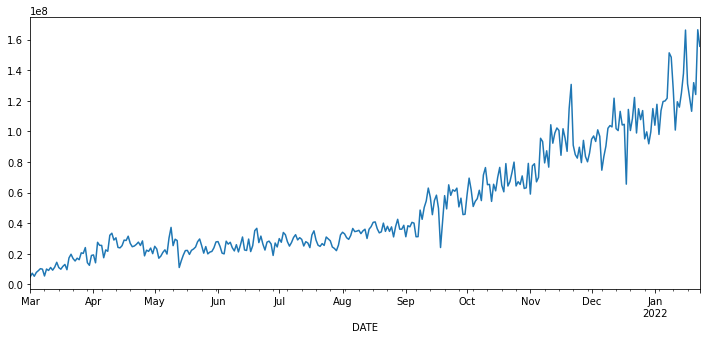

In [9]:
# MODEL 1
df['AMOUNT'].plot(figsize=(12,5))

In [10]:
df['LOG_AMOUNT'] = np.log(df['AMOUNT'])
df.head()

,AMOUNT,LOG_AMOUNT
DATE,,
2021-03-01,4994663,15.423881
2021-03-02,7387373,15.815283
2021-03-03,5363164,15.495065
2021-03-04,7891971,15.881356
2021-03-05,9037821,16.016929


<AxesSubplot:xlabel='DATE'>

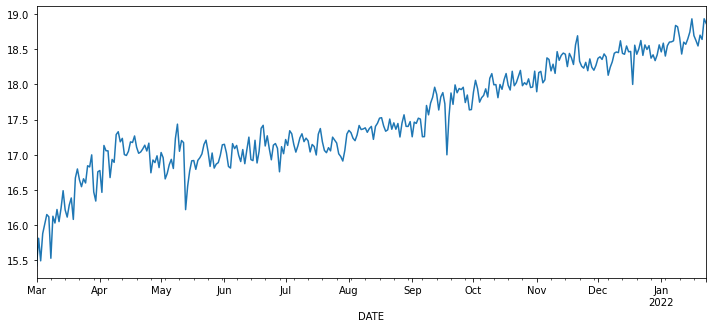

In [11]:
# MODEL 2
df['LOG_AMOUNT'].plot(figsize=(12,5))

**Stationarity Check**

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of Lags : ', dftest[2])
    print('4. Num of Observation used for ADF Regression & Critical Values Calc. : ', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [14]:
# STATIONARITY MODEL 1
ad_test(df['AMOUNT'])

1. ADF :  1.8466669729582286
2. P-Value :  0.9984372178077108
3. Num of Lags :  15
4. Num of Observation used for ADF Regression & Critical Values Calc. :  313
5. Critical Values : 
	 1% :  -3.4514162625887037
	 5% :  -2.8708187088091406
	 10% :  -2.5717136883095675


In [15]:
# STATIONARITY MODEL 2
ad_test(df['LOG_AMOUNT'])

1. ADF :  -1.4615593330601113
2. P-Value :  0.5524345114320917
3. Num of Lags :  6
4. Num of Observation used for ADF Regression & Critical Values Calc. :  322
5. Critical Values : 
	 1% :  -3.4508226600665037
	 5% :  -2.870558121868621
	 10% :  -2.571574731684734


In [26]:
df["diff_1"] = df["AMOUNT"].diff(periods=1)
df["diff_2"] = df["AMOUNT"].diff(periods=2)
df["diff_3"] = df["AMOUNT"].diff(periods=3)

df.head(6)

,AMOUNT,LOG_AMOUNT,diff_1,diff_2,diff_3
DATE,,,,,
2021-03-01,4994663,15.423881,NaN,NaN,NaN
2021-03-02,7387373,15.815283,2392710.0,NaN,NaN
2021-03-03,5363164,15.495065,-2024209.0,368501.0,NaN
2021-03-04,7891971,15.881356,2528807.0,504598.0,2897308.0
2021-03-05,9037821,16.016929,1145850.0,3674657.0,1650448.0
2021-03-06,10341277,16.151654,1303456.0,2449306.0,4978113.0


In [27]:
ad_result = ad_test(df["diff_1"].dropna())
print(ad_result)

1. ADF :  -5.154630076740369
2. P-Value :  1.087436193947233e-05
3. Num of Lags :  14
4. Num of Observation used for ADF Regression & Critical Values Calc. :  313
5. Critical Values : 
	 1% :  -3.4514162625887037
	 5% :  -2.8708187088091406
	 10% :  -2.5717136883095675
None


In [28]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [30]:
stepwise_fit = auto_arima(df["diff_1"].dropna(), trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11418.548, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11499.481, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11460.457, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11427.181, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11498.190, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11421.785, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11425.579, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=11416.266, Time=0.71 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11418.964, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=11413.610, Time=0.93 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=11417.203, Time=0.35 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=11397.757, Time=0.73 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=11398.336, Time=0.37 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=11385.719, Time=1.81 sec
 ARIMA(4,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  328
Model:               SARIMAX(5, 0, 3)   Log Likelihood               -5682.860
Date:                Wed, 26 Jan 2022   AIC                          11385.719
Time:                        01:28:23   BIC                          11423.650
Sample:                             0   HQIC                         11400.852
                                - 328                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.579e+06   4.26e-08   3.71e+13      0.000    1.58e+06    1.58e+06
ar.L1         -0.2495      0.074     -3.393      0.001      -0.394      -0.105
ar.L2         -0.8845      0.078    -11.343      0.000      -1.037      -0.732
ar.L3         -0.0734      0.109     -0.673      0.501      -0.287       0.140
ar.L4         -0.0964      0.063     -1.535      0.125      -0.219       0.027
ar.L5         -0.2757      0.055     -4.992      0.000      -0.384      -0.167
ma.L1         -0.2922      0.073     -3.982      0.000      -0.436      -0.148
ma.L2          0.6454      0.052     12.496      0.000       0.544       0.747
ma.L3         -0.6889      0.073     -9.486      0.000      -0.831      -0.547
sigma2      7.007e+13   1.08e-15   6.51e+28      0.000    7.01e+13    7.01e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               289.76
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               7.55   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+44. Standard errors may be unstable.
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA

**--===================================================================================================================--**

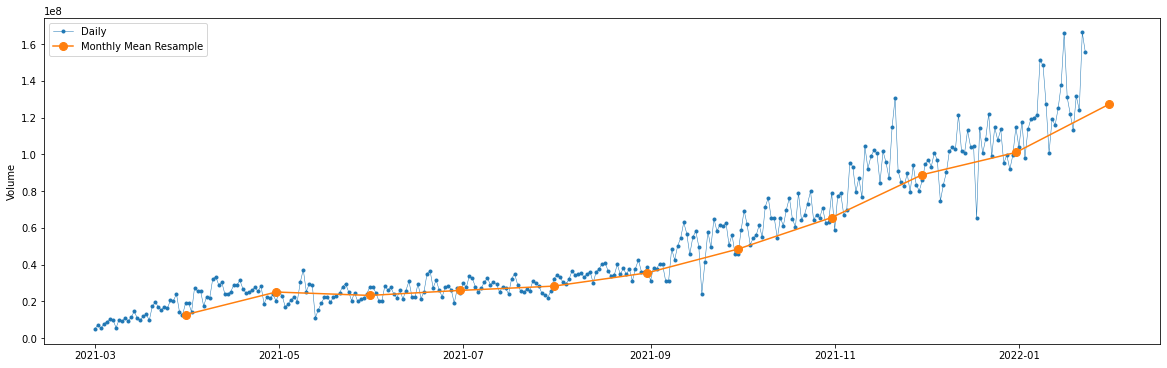

In [34]:
import warnings
import matplotlib.pyplot as plt

y = df['AMOUNT']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y, marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('M').mean(), marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Volume')
ax.legend()

**SEASONAL DECOMPOSITION CHECK**

In [35]:
import statsmodels.api as sm

def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

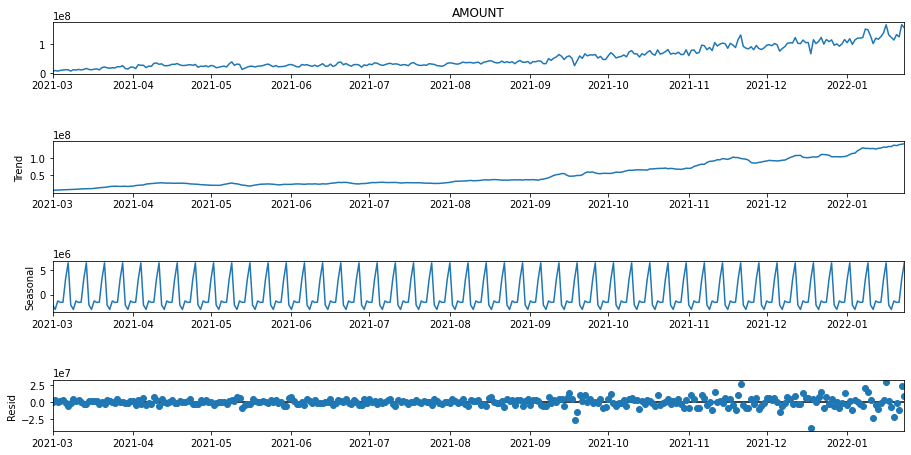

In [36]:
seasonal_decompose(y)

In [67]:
def seasonal_decompose_mult (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

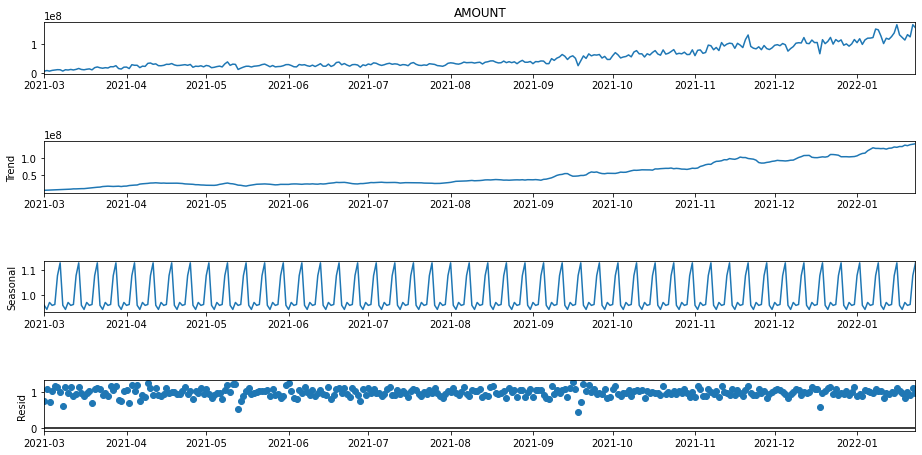

In [68]:
seasonal_decompose_mult(y)

**Stationarity Check**

In [37]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=7).mean() 
    rolstd = pd.Series(timeseries).rolling(window=7).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

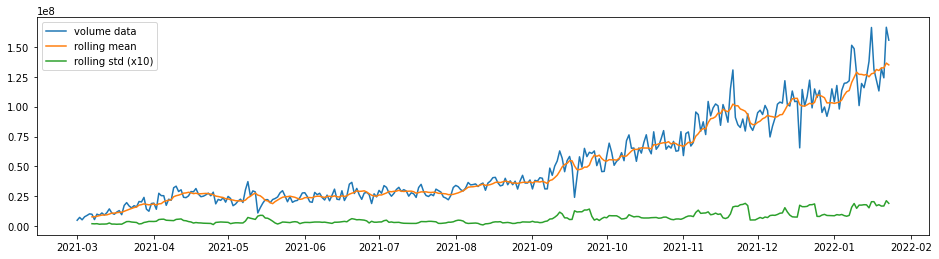

In [38]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'volume data')

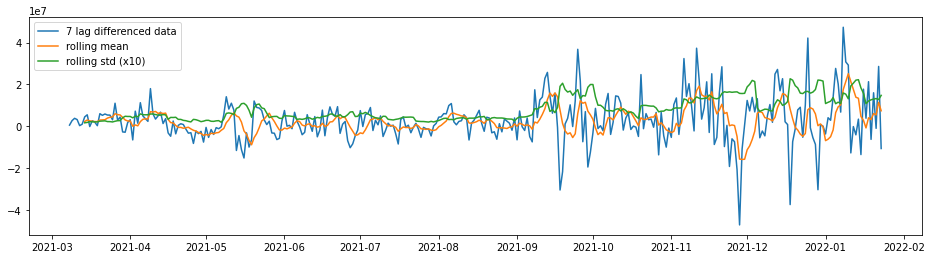

In [40]:
# Differencing
y_7lag =  y - y.shift(7)
test_stationarity(y_7lag,'7 lag differenced data')

In [43]:
ad_result_2 = ad_test(y_7lag.dropna())
print(ad_result_2)

1. ADF :  -5.234660743433998
2. P-Value :  7.4670397175079206e-06
3. Num of Lags :  8
4. Num of Observation used for ADF Regression & Critical Values Calc. :  313
5. Critical Values : 
	 1% :  -3.4514162625887037
	 5% :  -2.8708187088091406
	 10% :  -2.5717136883095675
None


In [48]:
train_data = y[:'2021-11-30']
test_data = y['2021-12-01':]
predict_date = len(y) - len(y[:'2021-12-01'])

# Training Model

*Simple Exponential Smoothing (SES)*

In [49]:
from statsmodels.tsa.api import SimpleExpSmoothing 

In [50]:
def ses(y, train_data, test_data, smoothing_level, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - test_data) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(train_data).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - test_data) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 32846208.93
The Root Mean Squared Error of our forecasts with auto optimization is 32569348.62


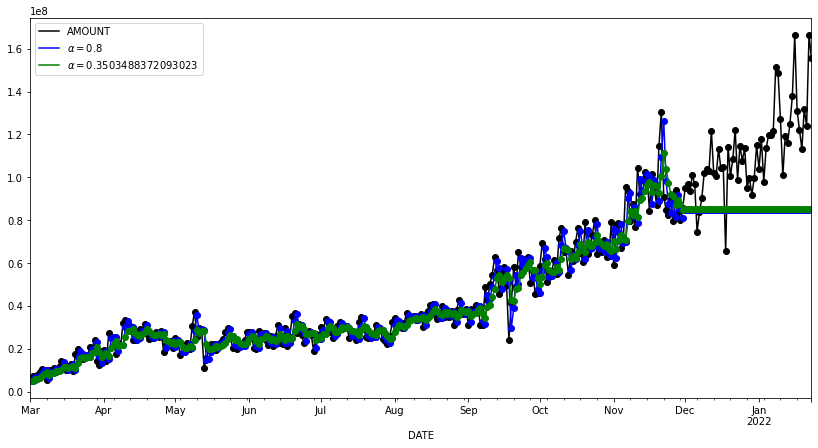

In [51]:
ses(y, train_data, test_data, 0.8, predict_date)

*Holt’s Linear Trend Method*

In [52]:
from statsmodels.tsa.api import Holt

In [53]:
def holt(y,train_data,test_data,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(train_data).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - test_data) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(train_data, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - test_data) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 64863696.81
The Root Mean Squared Error of Holts Exponential trend 52950598.8


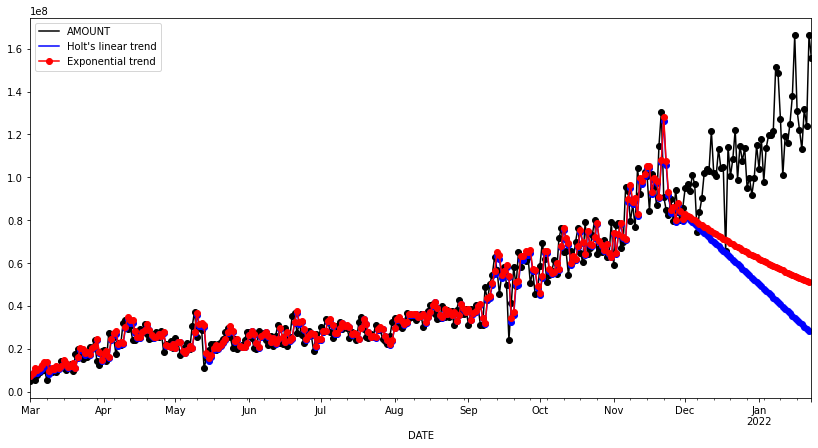

In [54]:
holt(y, train_data, test_data, 0.6, 0.2, predict_date)

The Root Mean Squared Error of Holts Linear trend 44769867.88
The Root Mean Squared Error of Holts Exponential trend 22586435.96


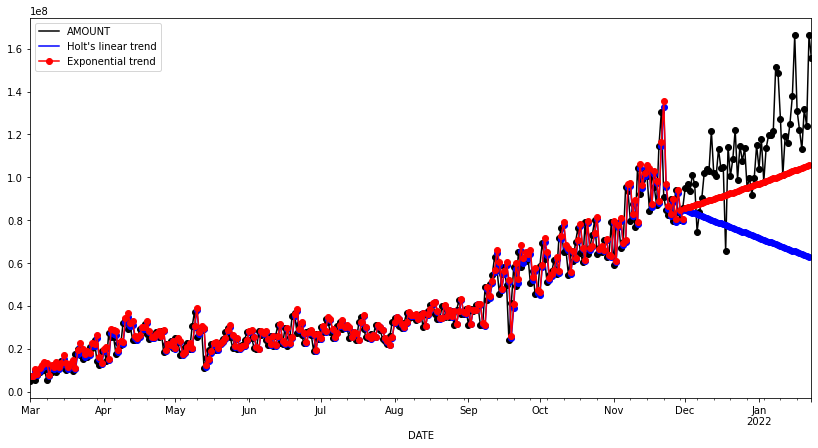

In [70]:
holt(y, train_data, test_data, 0.9, 0.1, predict_date)

*Holt-Winters’ Seasonal Method*

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing

In [56]:
def holt_win_sea(y, train_data, test_data, seasonal_type, seasonal_period, predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(train_data, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - test_data) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(train_data, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - test_data) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(train_data, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - test_data) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(train_data, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - test_data) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 15858540.08
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=52 and a Box-Cox transformation 31552482.37


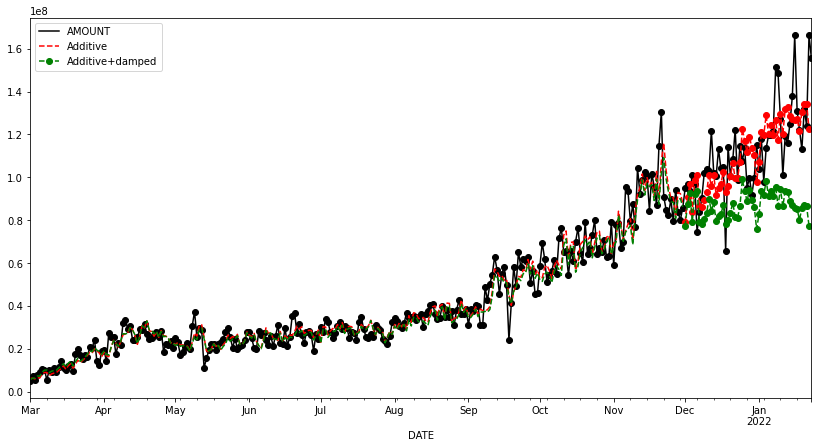

In [58]:
# Additive
holt_win_sea(y, train_data, test_data, 'additive', 52, predict_date)

The Root Mean Squared Error of additive trend, multiplicative seasonal of period season_length=52 and a Box-Cox transformation 16305654.69
The Root Mean Squared Error of additive damped trend, multiplicative seasonal of period season_length=52 and a Box-Cox transformation 16305654.69


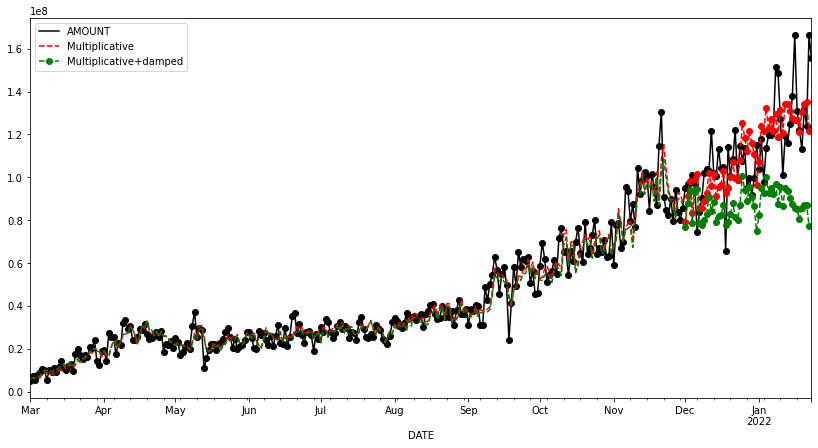

In [75]:
# Multiplicative
holt_win_sea(y, train_data, test_data, 'multiplicative', 52, predict_date)

*SARIMA*

In [59]:
import itertools

def sarima_grid_search(y, seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [60]:
sarima_grid_search(y,52)

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:7805.585508093671


In [81]:
sarima_grid_search(y,2)

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(1, 0, 1, 2) - AIC:11275.025039141037


In [61]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y, order, seasonal_order, seasonal_period, pred_date, y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=order,
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - test_data) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - test_data) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2696      0.094      2.867      0.004       0.085       0.454
ma.L1         -0.8292      0.058    -14.243      0.000      -0.943      -0.715
ma.S.L52      -0.9511      0.092    -10.332      0.000      -1.132      -0.771
sigma2      1.358e+14        nan        nan        nan         nan         nan


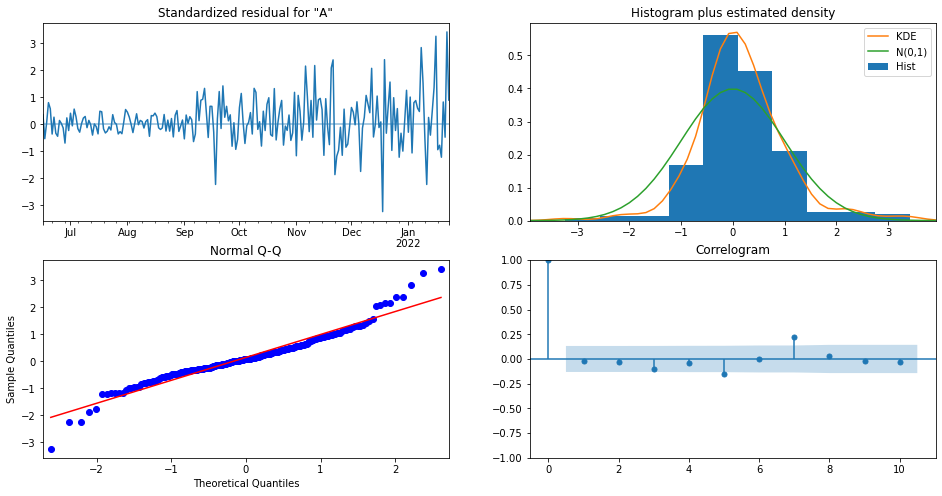

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 14771556.43


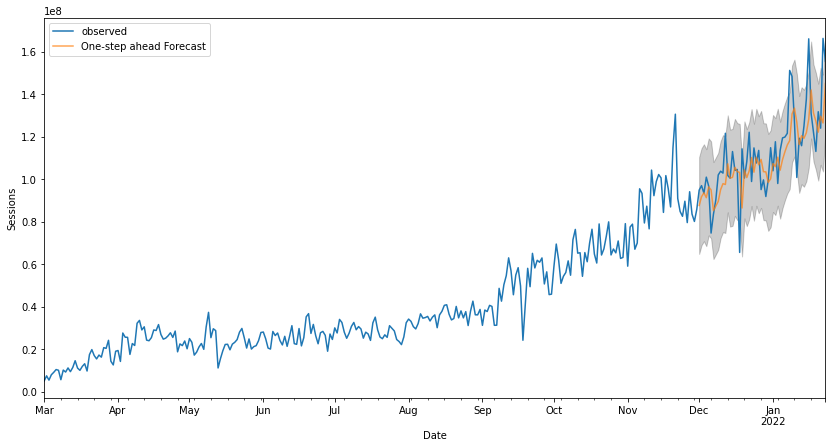

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = True 27636906.15


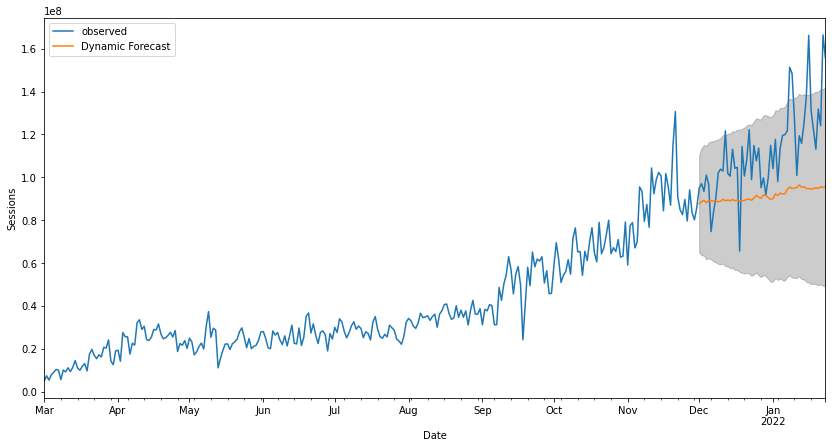

In [64]:
model = sarima_eva(y,(1, 1, 1),(0, 1, 1, 52),52,'2021-12-01',test_data)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2825      0.061      4.657      0.000       0.164       0.401
ma.L1         -0.8618      0.048    -17.820      0.000      -0.957      -0.767
ar.S.L2        0.9779      0.024     41.232      0.000       0.931       1.024
ma.S.L2       -0.9143      0.056    -16.243      0.000      -1.025      -0.804
sigma2      8.105e+13        nan        nan        nan         nan         nan


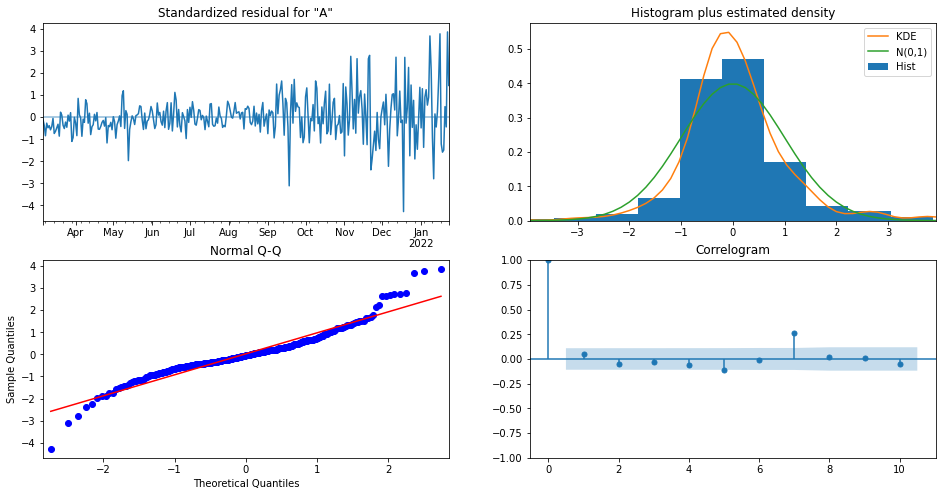

The Root Mean Squared Error of SARIMA with season_length=2 and dynamic = False 14449567.04


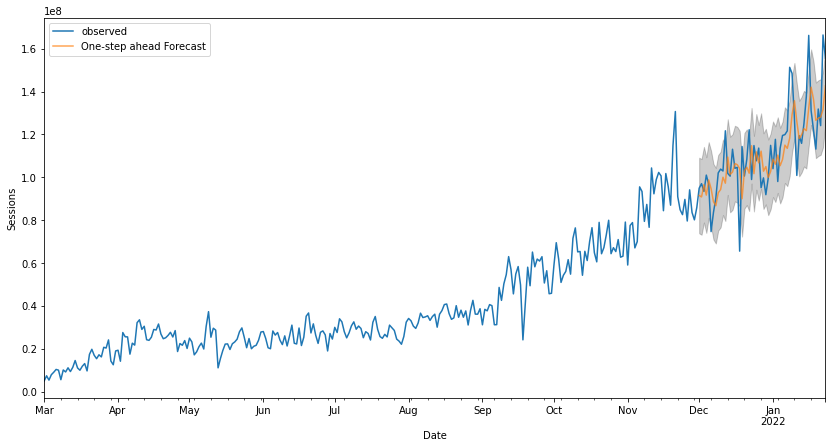

The Root Mean Squared Error of SARIMA with season_length=2 and dynamic = True 23628395.47


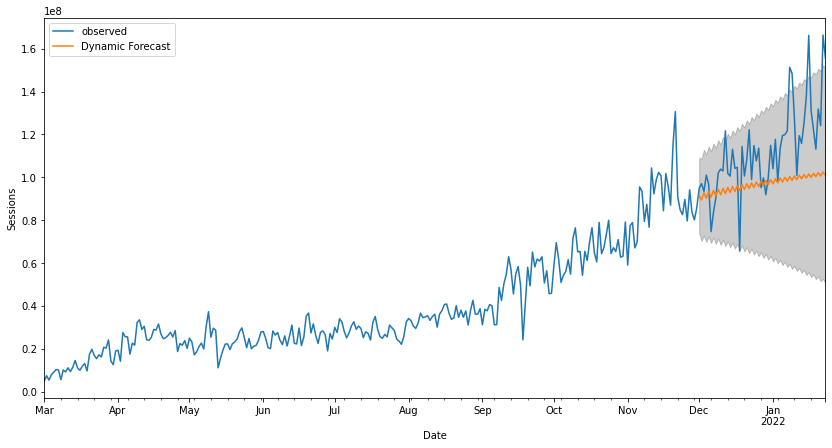

In [82]:
model_2 = sarima_eva(y,(1, 1, 1),(1, 0, 1, 2),2,'2021-12-01',test_data)

# Forecast

In [76]:
def forecast(model, predict_steps, y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.05)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

In [89]:
# final_table = forecast(model,52,y)
# final_table

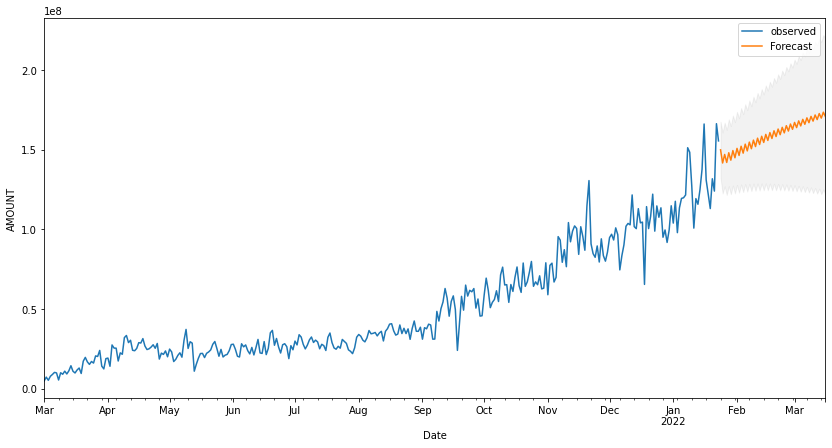

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-24,149974817.36557174,132329913.99899939,167619720.73214409
1,2022-01-25,141719503.37553850,122577136.18550918,160861870.56556782
2,2022-01-26,147069415.14423111,127108318.66308138,167030511.62538084
3,2022-01-27,142055932.99664041,121659501.23402724,162452364.75925359
4,2022-01-28,148152126.76599810,127180924.82142502,169123328.71057117
5,2022-01-29,143493342.51986438,122120785.72826844,164865899.31146032
6,2022-01-30,149524042.67913216,127577997.37062122,171470087.98764309
7,2022-01-31,144987485.05304575,122623857.50515056,167351112.60094094
8,2022-02-01,150890680.88928548,127939573.94418493,173841787.83438602
9,2022-02-02,146455730.37915549,123068350.32113282,169843110.43717813


In [87]:
final_table_2 = forecast(model_2,52,y)
final_table_2.head(10)